<a href="https://colab.research.google.com/github/elsa9421/Interactive-IPython-Demos/blob/main/Probabilistic_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook demostrates step by step EM algorithm for probabilistic PCA.



<br> **Reference:**
<br>Chapter 12: Latent Linear Models
<br>Murphy, Kevin P.. Machine Learning : A Probabilistic Perspective, MIT Press, 2012. ProQuest Ebook Central, http://ebookcentral.proquest.com/lib/umichigan/detail.action?docID=3339490.
<br>Created from umichigan on 2020-08-19 13:27:29.

## Import 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from math import pi,cos,sin,sqrt, log
from scipy.stats.distributions import chi2 
import sys
import ipywidgets as widgets
from IPython import display



## Data points
X=np.array([[-2.3,1],[-2,2.2],[-1.6,2],[-1,1.3],[-.8,0.6],
            [-.6,0.2],[-.2,-2],[-.1,0.7],[0.1,-1.4],[0.5,-.8],[0.2,-.3],[0.1,0.2],
            [0.2,0.5],[0.3,0.1],[0.7,1.35],[1.7,1.9],[1,-2],[1.8,0.3],[1.4,0.3],[1.1,-.6],[1.5,-1.5],[1.5,-1.4]])


N=X.shape[0]


def plot_ellipse(m,S):
  '''
  Plot an Elliptical contour of a bivariate Gaussian density

  Input:
  -m:mean
  -S:covariance matrix

  Output:
  -z : ellipse boundary points for plotting using
      >> plot(z[0,:],z[1,:])
  '''

  d=len(m)
  if d!=2:
    sys.exit("Plot ellipse assumes 2D data")
  
  #beta= theoretical mass enclosed
  beta=.9
  r=sqrt(chi2.ppf(beta, df=2))

  #Plot circle
  N=500
  t=np.linspace(0,2*pi,N+1)[:-1]
  u=r*np.array([np.cos(t),np.sin(t)])
  eigVal, eigVec = np.linalg.eig(S)

  z=np.dot(np.dot(eigVec,np.sqrt(np.diag(eigVal))),u) + m.reshape(-1,1)

  return z

### EM Algorithm for PCA

EM for PCA relies on the probabilistic formulation of PCA. 
<br> Let $ \tilde{X} = X^T$ store the original data along its columns. Where, $X$ is a $N x D$ matrix, with $N$ sample points of $D$ dimensions each.
<br>Similarly, let $Z$ be a $L × N$ matrix storing the posterior means (low-dimensional representations) along its columns. Where, $L < D$

* E step :
$ \tilde{Z} = (W^T W)^{-1} W^T \tilde{X} $
<br>Notice that this is just an orthogonal projection of the data. 

* M step :
$ W=\tilde{X} \tilde{Z}^T (\tilde{Z}\tilde{Z}^T)^{-1} $


<br> Tipping and Bishop 1999 showed that the only stable ﬁxed point of the EM algorithm is the globally optimal solution. That is, the EM algorithm converges to a solution where $W$ spans the same linear subspace as that deﬁned by the ﬁrst $L$ eigenvectors.




### Physical Analogy

This algorithm has a simple physical analogy in the case $D = 2$ and $L = 1$
(Roweis 1997). 
<br> Consider some points in $\mathbb{R}^2$ attached by springs to a rigid rod, whose orientation is deﬁned by a vector $w$ . <br> Let $z_i$ be the location where the $i^{th}$ spring attaches to the rod. 
* In the E step, we hold the rod ﬁxed, and let the attachment points slide around so as to minimize the spring energy (which is proportional to the sum of squared residuals).
* In the M step, points ﬁxed and let the rod rotate so as to minimize the spring energy. 

### Illustration of EM for PCA when D = 2 and L = 1 .

* Green stars are the original data points
* black circles are their reconstructions.
* The weight vector $w$ is represented by blue line. 
* The red Elliptical contour is obtained with the Mean of the data reconstructions (black circles) and covariance of the Data Matrix $X$ 
> (a) We start with a random initial guess of w .
The E step is represented by the orthogonal projections. 
<br> (b) We update the rod w in the M step, keeping the projections onto the rod (black circles) ﬁxed. 
<br> (c) Another E step. The black circles can ’slide’ along the rod, but the rod stays ﬁxed. 
<br> (d) Another M step. Based on Figure 12.12 of (Bishop 2006b).

Repeat E and M steps until convergence


Button(description='Next Step', style=ButtonStyle())

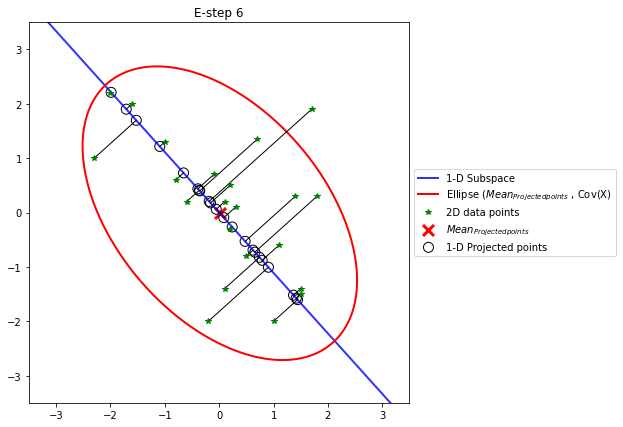

In [ ]:
E_iter=-1
M_iter=0

#-------------------------------------------
# Initial guess for w

# W of shape (D,L); D=2,L=1
D=2
L=1
np.random.seed(5)
W=np.random.normal((D,L))
W=W/np.linalg.norm(W)
   # Make sure W is Orthonormal
#print("W.TW",np.dot(W,W.T)) # aproxx =1
#------------------------------------------
def plot_step(X,W,Z,step):
  '''
  Plot graph for E-step

  Input:
  X: of shape(N,D), data points
  W: of shape (D,L), obtained from M-step
  Z: of shape (L,N), obtained E-step (Projection points)

  '''
  global E_iter

  # Plot line for vector w
  N,D=X.shape

  xvec=np.linspace(-3.5,3.5)
  slope=W[1]/W[0]
  # print("Slope of line -vector w (blue line)=",slope)

 

  Proj_Z_2D=np.dot(W,Z).T #(N,D)
  Mu=np.mean(Proj_Z_2D,axis=0)

  plt.plot(xvec,slope*xvec,'b',alpha=0.8,lw=2, label="1-D Subspace")
  
  Cov=np.cov(X.T)
  e=plot_ellipse(Mu,Cov)
  e=e.T
  


  
  if E_iter!=0:
    plt.plot(e[:,0],e[:,1],color='r',lw=2,label="Ellipse ($Mean_{Projection points}$ , Cov(X)")
    plt.scatter(Mu[0],Mu[1],marker='x',color='red',s=120,lw=3, label='$Mean_{Projected points}$')
    plt.scatter(Proj_Z_2D[:,0], Proj_Z_2D[:,1],color='k',s=100, facecolors='none', edgecolors='k',label='1-D Projected points')

    for i in range(len(X)):
      m2=(X[i][1]-Proj_Z_2D[i][1])/(X[i][0]-Proj_Z_2D[i][0])
      # print("Slope of projection lines=",m2)
      c2=-m2*Proj_Z_2D[i][0]+Proj_Z_2D[i][1]
      x_end=Proj_Z_2D[i][0]   
      x_start=X[i][0]
      if x_start<=x_end:
        x_vec2=np.linspace(x_start,x_end)
      else:
        x_vec2=np.linspace(x_start,x_end)
      error_line=m2* x_vec2 +c2 
      plt.plot(x_vec2, error_line, "k-",color='k',linewidth=1)

    plt.title("{}-step {}".format(step,E_iter))
  if E_iter==0:
    plt.title("Initial Plot before E step")
  plt.plot(X[:,0],X[:,1],'g*', label='2D data points' )
  plt.xlim(-3.5,3.5)
  plt.ylim(-3.5,3.5)
  plt.gca().set_aspect('equal', adjustable='box')
  plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
  


def EM_step(X,step='E'):
  '''
  EM for Probabilistic PCA
  
  '''
  # E-Step
  global E_iter,M_iter,W,Z
  if step=='E':
    E_iter+=1
    Z=np.dot(np.linalg.inv(np.dot(W.T,W).reshape(L,L)),np.dot(W.T,X.T).reshape(L,N))  #(1,N)
    next='M'

  elif step=='M':
      #M- Step
    M_iter+=1
    W=np.dot(np.dot(X.T,Z.T),np.linalg.inv(np.dot(Z,Z.T)))
    next='E'

  plt.figure(figsize=(7,7))
  fig=plt.gcf()
  
  fig.set_facecolor('white')
  plot_step(X,W.reshape(D,L),Z,step=step)

  return next

EM_step(X)

button = widgets.Button(description="Next Step")
output = widgets.Output()
next='E'
def on_button_clicked(b):
  global next
  display.clear_output(wait=True)
  next=EM_step(X,next)
  display.display(button)

button.on_click(on_button_clicked)
display.display(button)
